<a href="https://www.kaggle.com/code/shubhamgupta012/crime-data-analysis?scriptVersionId=134649059" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/crime-data-from-2020-to-present/Crime_Data_from_2020_to_Present.csv


In [2]:
df =pd.read_csv('/kaggle/input/crime-data-from-2020-to-present/Crime_Data_from_2020_to_Present.csv')
pd.set_option('display.max_columns', None)


In [3]:
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,0444 0913,36,F,B,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,0416 1822 1414,25,M,H,102.0,SIDEWALK,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,1501,0,X,X,726.0,POLICE FACILITY,NaN,NaN,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,76,F,W,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,31,X,X,409.0,BEAUTY SUPPLY STORE,NaN,NaN,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


In [4]:
df.shape

(743817, 28)

In [5]:
df.describe()

,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
count,7.438170e+05,743817.000000,743817.000000,743817.000000,743817.000000,743817.000000,743817.000000,743808.000000,258193.000000,743808.000000,55086.000000,1839.000000,54.000000,743817.000000,743817.000000
mean,2.145867e+08,1334.877319,10.717617,1118.155374,1.415971,500.929161,29.920445,305.927261,362.581739,500.669532,957.231384,983.693312,989.925926,33.969753,-117.993467
std,1.019061e+07,653.669683,6.092044,609.211199,0.492889,207.982265,21.723517,216.805718,123.675447,207.771223,111.982666,51.595992,29.327591,1.881087,6.523385
min,8.170000e+02,1.000000,1.000000,101.000000,1.000000,110.000000,-2.000000,101.000000,101.000000,110.000000,210.000000,434.000000,821.000000,0.000000,-118.667600
25%,2.021079e+08,900.000000,6.000000,622.000000,1.000000,331.000000,11.000000,101.000000,309.000000,331.000000,998.000000,998.000000,998.000000,34.013300,-118.429500
50%,2.118209e+08,1415.000000,11.000000,1142.000000,1.000000,442.000000,31.000000,203.000000,400.000000,442.000000,998.000000,998.000000,998.000000,34.058500,-118.321400
75%,2.214132e+08,1900.000000,16.000000,1618.000000,2.000000,626.000000,45.000000,501.000000,400.000000,626.000000,998.000000,998.000000,998.000000,34.163000,-118.273900
max,2.399165e+08,2359.000000,21.000000,2199.000000,2.000000,956.000000,120.000000,974.000000,516.000000,956.000000,999.000000,999.000000,999.000000,34.334300,0.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743817 entries, 0 to 743816
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           743817 non-null  int64  
 1   Date Rptd       743817 non-null  object 
 2   DATE OCC        743817 non-null  object 
 3   TIME OCC        743817 non-null  int64  
 4   AREA            743817 non-null  int64  
 5   AREA NAME       743817 non-null  object 
 6   Rpt Dist No     743817 non-null  int64  
 7   Part 1-2        743817 non-null  int64  
 8   Crm Cd          743817 non-null  int64  
 9   Crm Cd Desc     743817 non-null  object 
 10  Mocodes         641793 non-null  object 
 11  Vict Age        743817 non-null  int64  
 12  Vict Sex        646777 non-null  object 
 13  Vict Descent    646771 non-null  object 
 14  Premis Cd       743808 non-null  float64
 15  Premis Desc     743393 non-null  object 
 16  Weapon Used Cd  258193 non-null  float64
 17  Weapon Des

In [7]:
df.dtypes

DR_NO               int64
Date Rptd          object
DATE OCC           object
TIME OCC            int64
AREA                int64
AREA NAME          object
Rpt Dist No         int64
Part 1-2            int64
Crm Cd              int64
Crm Cd Desc        object
Mocodes            object
Vict Age            int64
Vict Sex           object
Vict Descent       object
Premis Cd         float64
Premis Desc        object
Weapon Used Cd    float64
Weapon Desc        object
Status             object
Status Desc        object
Crm Cd 1          float64
Crm Cd 2          float64
Crm Cd 3          float64
Crm Cd 4          float64
LOCATION           object
Cross Street       object
LAT               float64
LON               float64
dtype: object

In [8]:
df.isnull().sum()

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes           102024
Vict Age               0
Vict Sex           97040
Vict Descent       97046
Premis Cd              9
Premis Desc          424
Weapon Used Cd    485624
Weapon Desc       485624
Status                 0
Status Desc            0
Crm Cd 1               9
Crm Cd 2          688731
Crm Cd 3          741978
Crm Cd 4          743763
LOCATION               0
Cross Street      624067
LAT                    0
LON                    0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df['AREA'].value_counts()

1     49870
12    47108
14    43371
3     41589
6     39715
18    38093
20    37757
15    37041
13    36952
7     35136
2     34581
8     34173
11    32193
9     31539
10    31130
5     30788
17    30099
21    30088
19    29611
4     27988
16    24995
Name: AREA, dtype: int64

In [11]:
df['AREA NAME'].value_counts()

Central        49870
77th Street    47108
Pacific        43371
Southwest      41589
Hollywood      39715
Southeast      38093
Olympic        37757
N Hollywood    37041
Newton         36952
Wilshire       35136
Rampart        34581
West LA        34173
Northeast      32193
Van Nuys       31539
West Valley    31130
Harbor         30788
Devonshire     30099
Topanga        30088
Mission        29611
Hollenbeck     27988
Foothill       24995
Name: AREA NAME, dtype: int64

In [12]:
df['Status'].value_counts()

IC    594994
AO     80195
AA     65037
JA      2341
JO      1247
CC         3
Name: Status, dtype: int64

In [13]:
df['Status Desc'].value_counts()

Invest Cont     594994
Adult Other      80195
Adult Arrest     65037
Juv Arrest        2341
Juv Other         1247
UNK                  3
Name: Status Desc, dtype: int64

In [14]:
df['Vict Sex'].value_counts()

M    308295
F    274977
X     63422
H        83
Name: Vict Sex, dtype: int64

In [15]:
df['Vict Descent'].value_counts()

H    228418
W    152841
B    106905
X     70355
O     58784
A     16232
K      3951
F      3084
C      2786
J      1049
V       748
I       708
Z       363
P       205
U       155
D        51
G        49
L        45
S        41
-         1
Name: Vict Descent, dtype: int64

In [16]:
df['Part 1-2'].value_counts()

1    434411
2    309406
Name: Part 1-2, dtype: int64

In [17]:
df['Weapon Desc'].value_counts()

STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)    138818
UNKNOWN WEAPON/OTHER WEAPON                        26682
VERBAL THREAT                                      19056
HAND GUN                                           15985
SEMI-AUTOMATIC PISTOL                               5883
                                                   ...  
MAC-11 SEMIAUTOMATIC ASSAULT WEAPON                    3
MAC-10 SEMIAUTOMATIC ASSAULT WEAPON                    2
M1-1 SEMIAUTOMATIC ASSAULT RIFLE                       1
HECKLER & KOCH 91 SEMIAUTOMATIC ASSAULT RIFLE          1
M-14 SEMIAUTOMATIC ASSAULT RIFLE                       1
Name: Weapon Desc, Length: 79, dtype: int64

In [18]:
df['LOCATION'].value_counts()

800 N  ALAMEDA                      ST      1373
7TH                                         1224
6TH                          ST             1219
7TH                          ST             1189
6TH                                         1144
                                            ... 
GLEASON                      AV                1
10400    FAIRGROVE                    AV       1
BECK                         ST                1
5200    BONNER                       AV        1
6400 N  FIGUEROAA                    ST        1
Name: LOCATION, Length: 62345, dtype: int64

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# PIE CHART

<Axes: ylabel='AREA'>

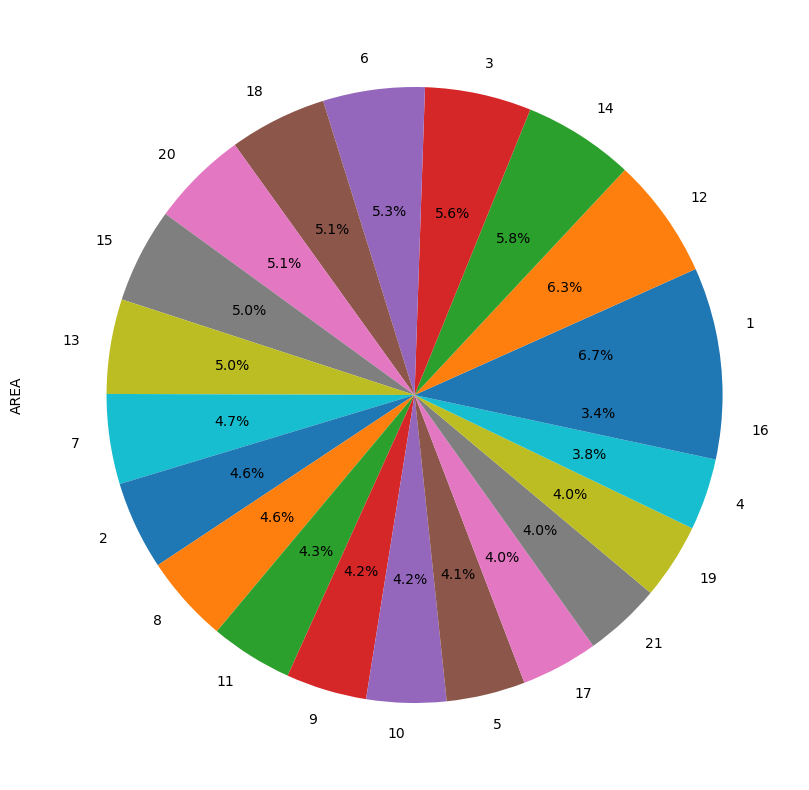

In [20]:
plt.figure(figsize=(20,10))
df['AREA'].value_counts().plot.pie(autopct='%1.1f%%')

<Axes: ylabel='AREA NAME'>

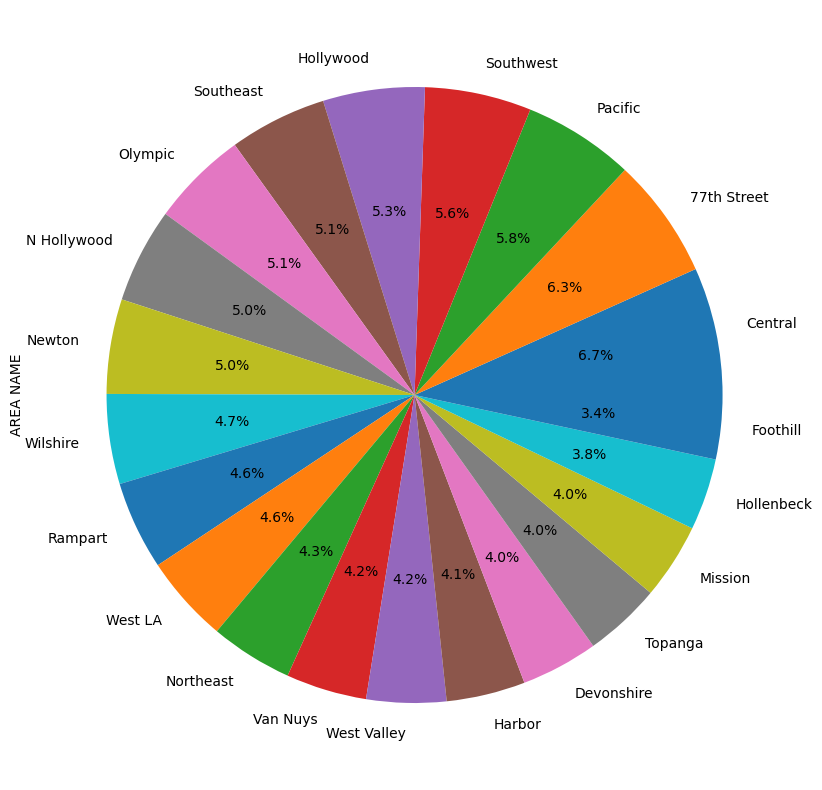

In [21]:
plt.figure(figsize=(20,10))
df['AREA NAME'].value_counts().plot.pie(autopct='%1.1f%%')

<Axes: ylabel='Status'>

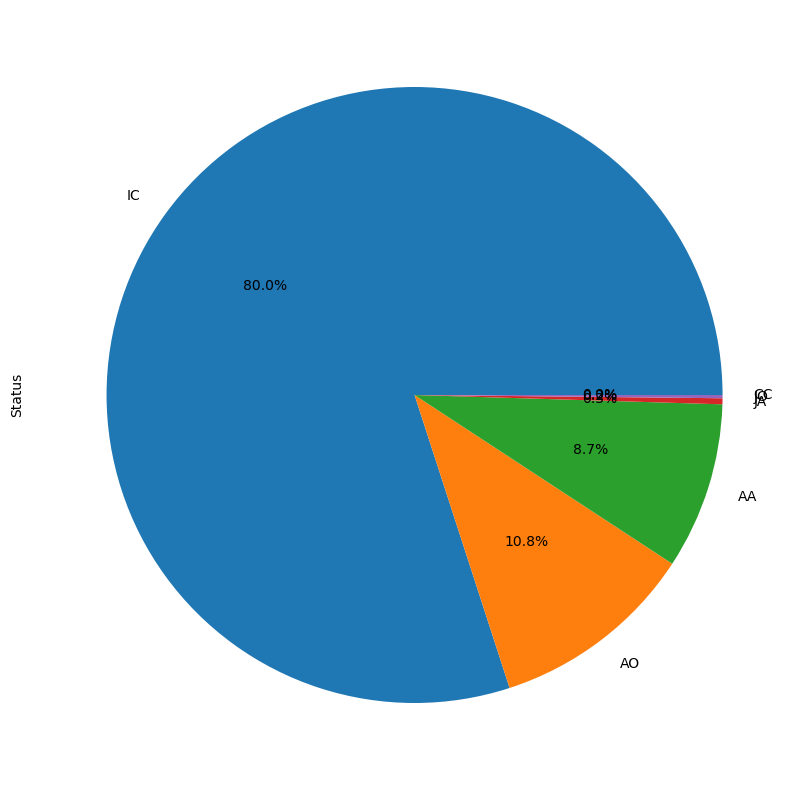

In [22]:
plt.figure(figsize=(20,10))
df['Status'].value_counts().plot.pie(autopct='%1.1f%%')

<Axes: ylabel='Status Desc'>

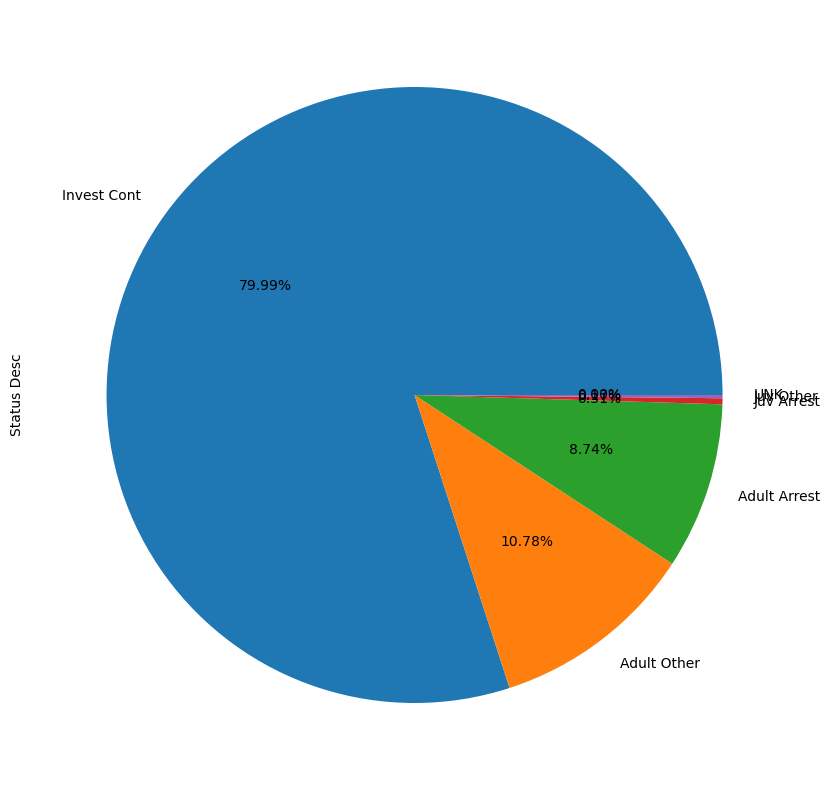

In [23]:
plt.figure(figsize=(20,10))
df['Status Desc'].value_counts().plot.pie(autopct='%1.2f%%')

<Axes: ylabel='Vict Sex'>

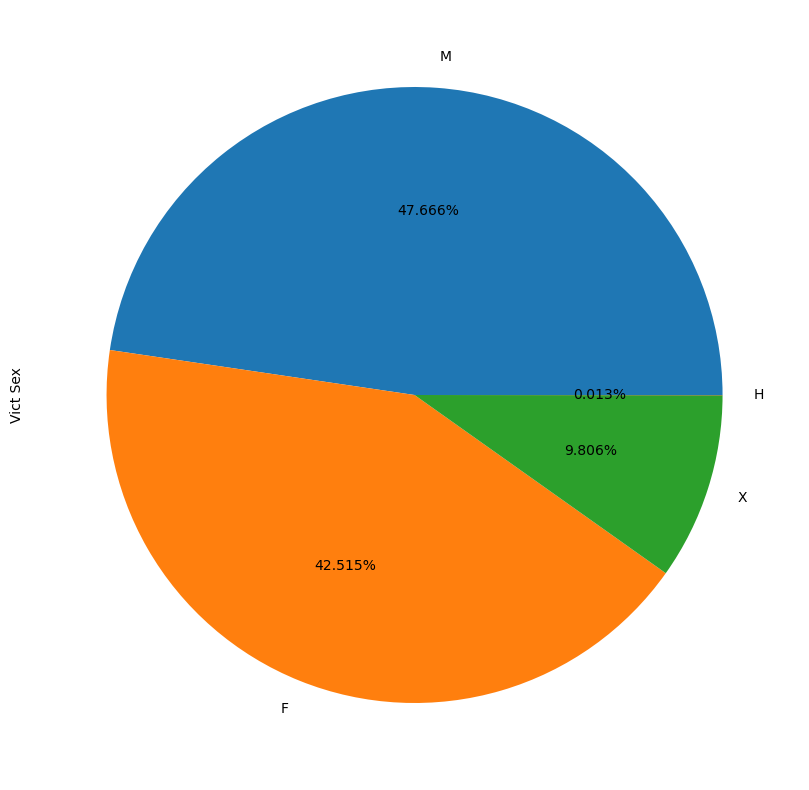

In [24]:
plt.figure(figsize=(20,10))
df['Vict Sex'].value_counts().plot.pie(autopct='%1.3f%%')

<Axes: ylabel='Vict Descent'>

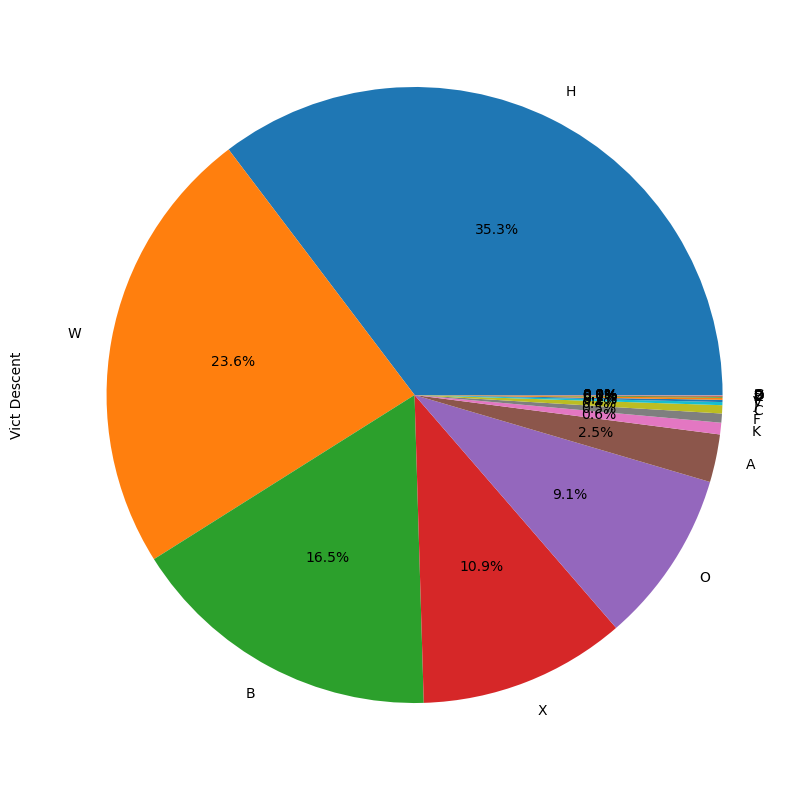

In [25]:
plt.figure(figsize=(20,10))
df['Vict Descent'].value_counts().plot.pie(autopct='%1.1f%%')

<Axes: ylabel='Part 1-2'>

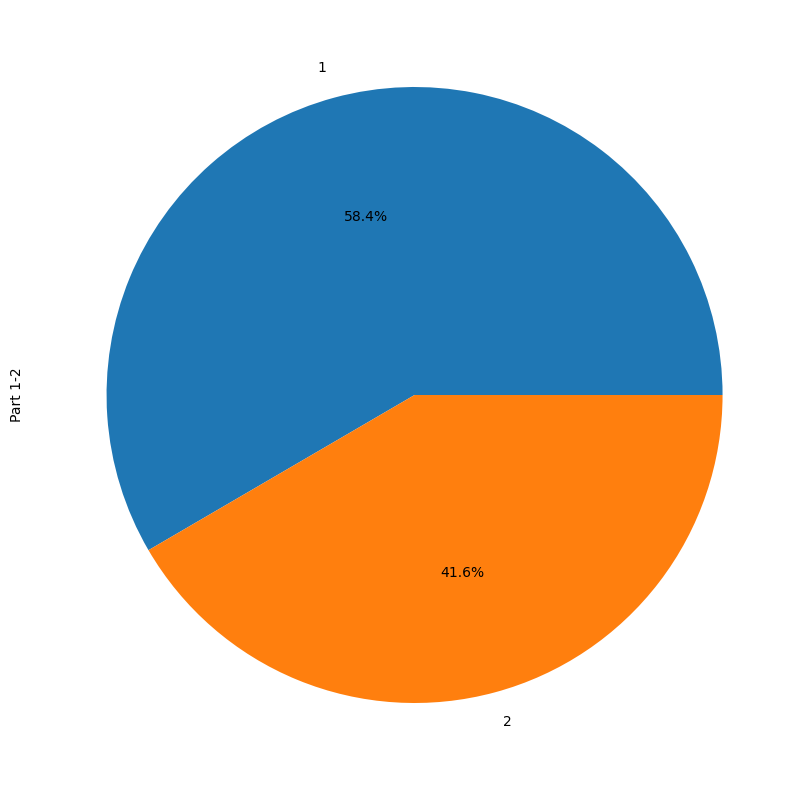

In [26]:
plt.figure(figsize=(20,10))
df['Part 1-2'].value_counts().plot.pie(autopct='%1.1f%%')

<Axes: ylabel='Weapon Desc'>

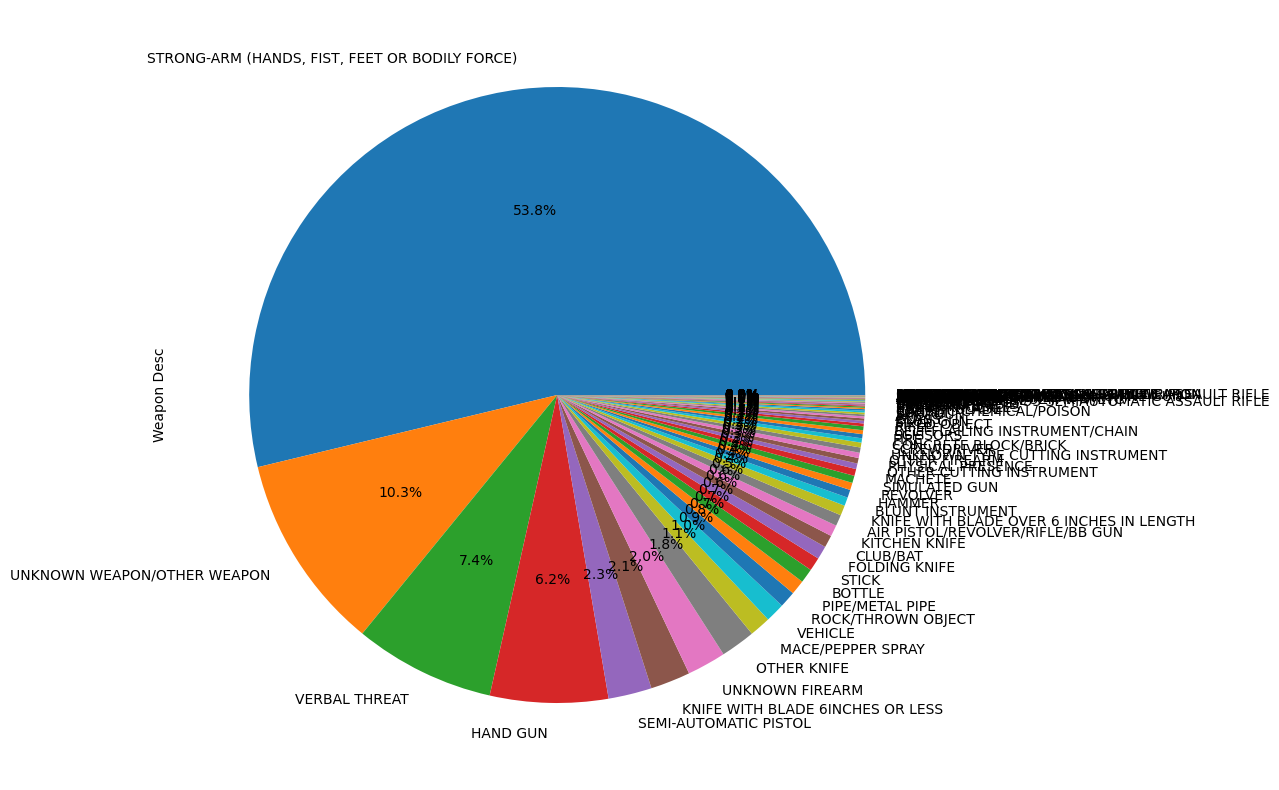

In [27]:
plt.figure(figsize=(20,10))
df['Weapon Desc'].value_counts().plot.pie(autopct='%1.1f%%')

In [28]:
plt.figure(figsize=(20,10))
# df['LOCATION'].value_counts().plot.pie(autopct='%1.1f%%')

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

In [29]:
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'], format='%m/%d/%Y %I:%M:%S %p')

In [30]:
# df.set_index('DATE OCC', inplace=True)

In [31]:
df['DATE OCC'].value_counts()

2022-12-02    1125
2020-01-01    1089
2022-10-01    1038
2023-02-02    1027
2022-06-01    1019
              ... 
2020-03-29     421
2020-03-22     417
2020-04-09     415
2023-06-18     314
2023-06-19     111
Name: DATE OCC, Length: 1266, dtype: int64

In [32]:
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,2020-01-08,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,0444 0913,36,F,B,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,2020-01-01,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,0416 1822 1414,25,M,H,102.0,SIDEWALK,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,2020-02-13,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,1501,0,X,X,726.0,POLICE FACILITY,NaN,NaN,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,2020-01-01,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,76,F,W,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,2020-01-01,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,31,X,X,409.0,BEAUTY SUPPLY STORE,NaN,NaN,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


<Axes: >

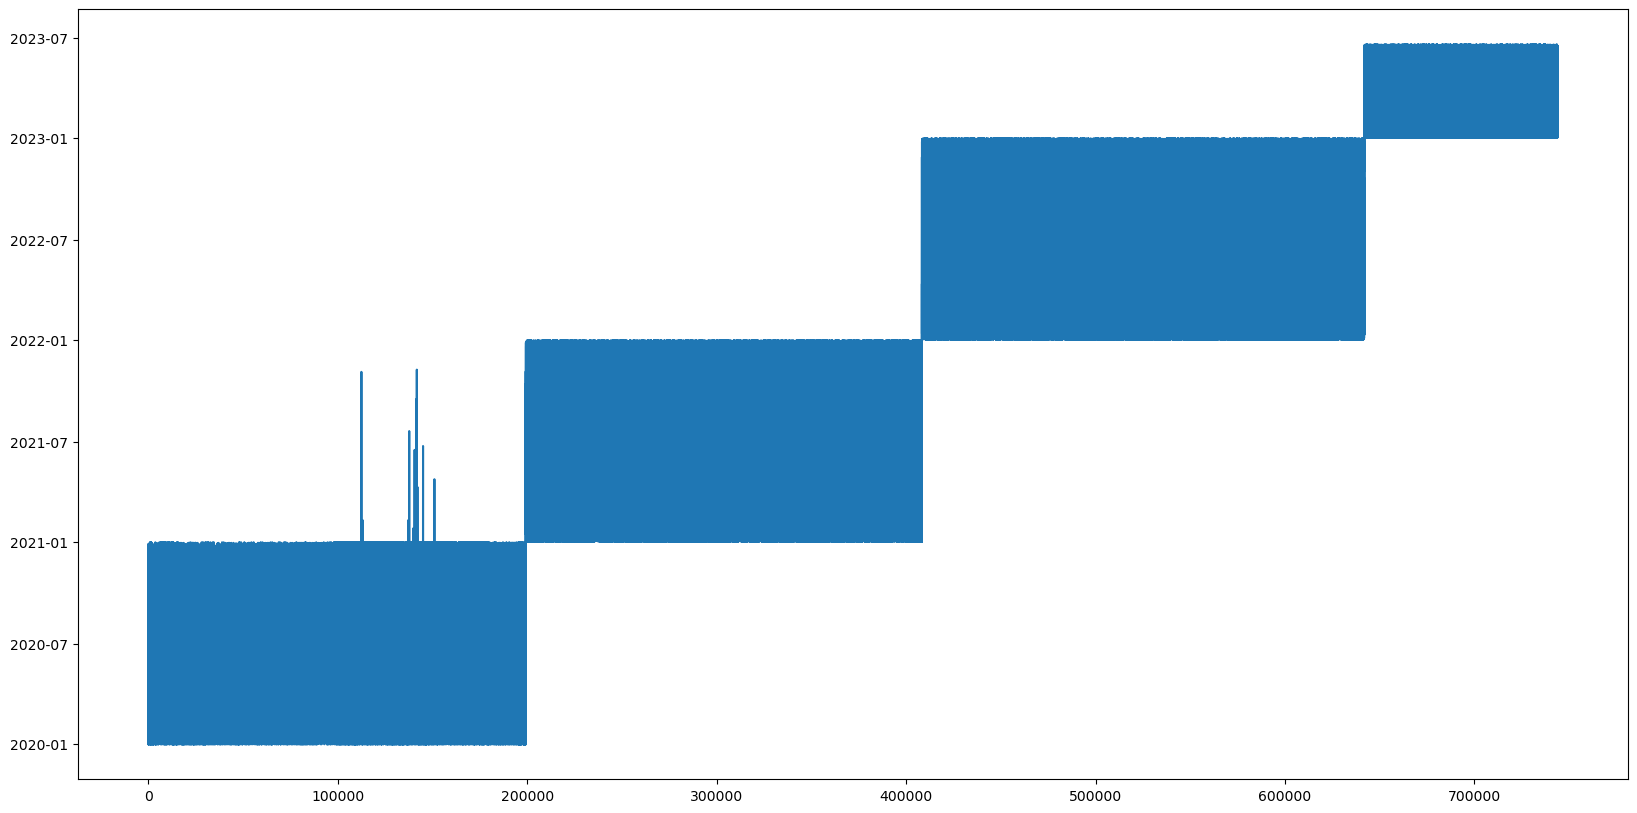

In [33]:

df['DATE OCC'].plot(figsize=(20, 10))

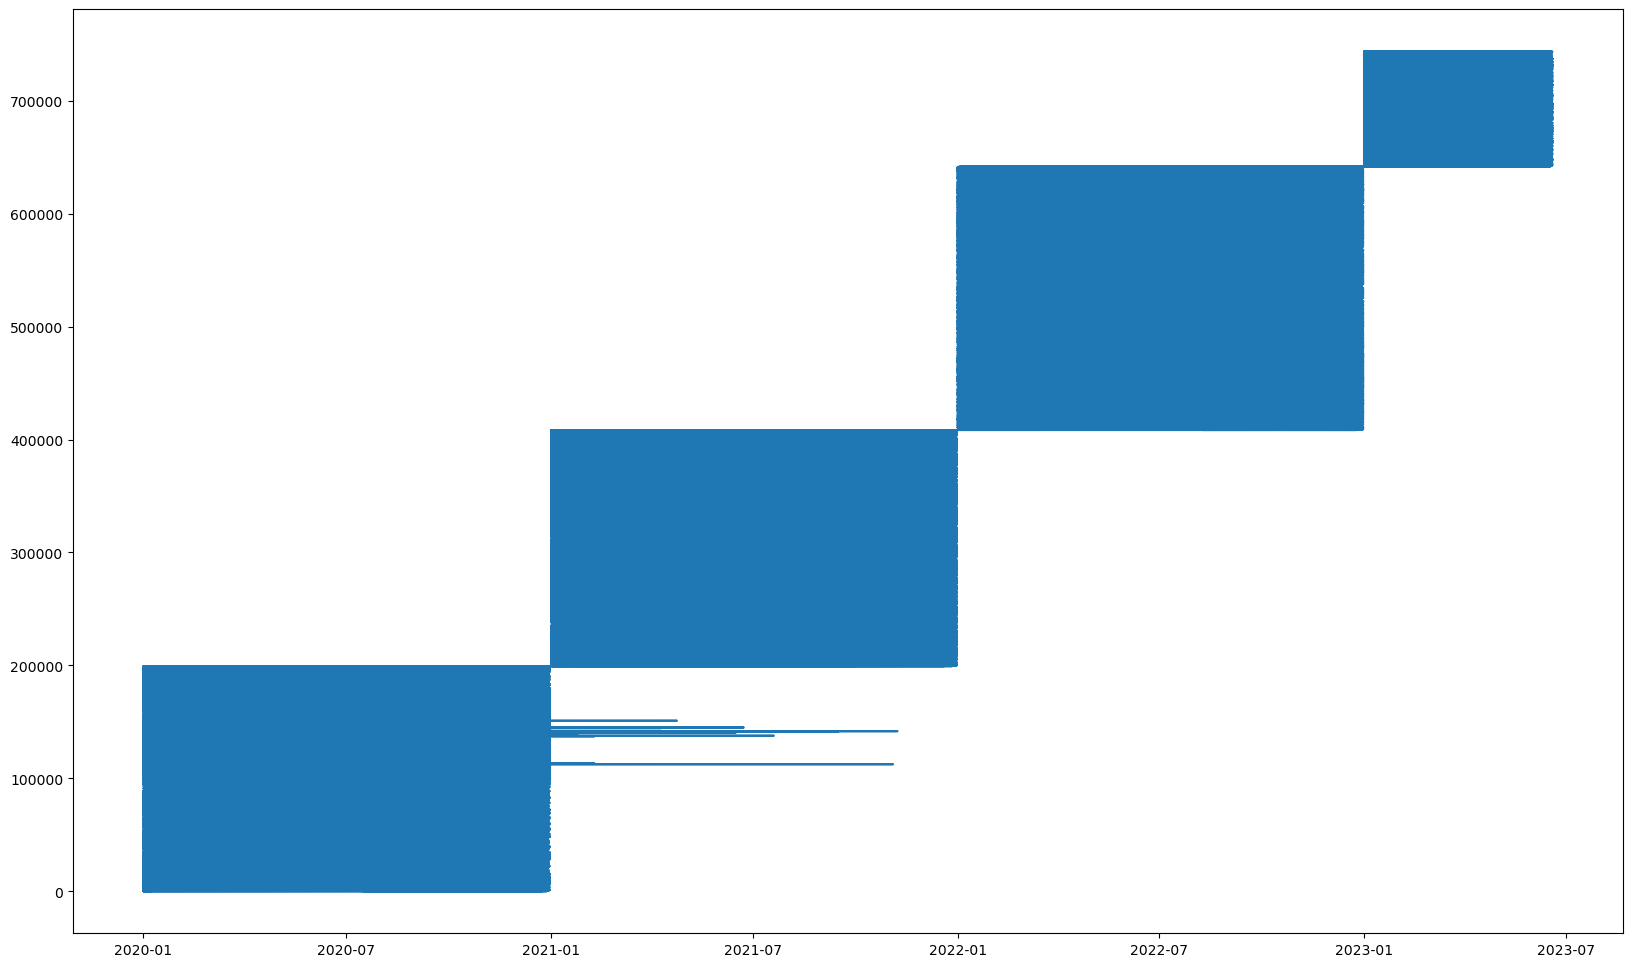

In [34]:
plt.figure(figsize=(20,12))
plt.plot(df['DATE OCC'],df.index)

In [35]:
import plotly.express as px
import pandas as pd

/opt/conda/lib/python3.10/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


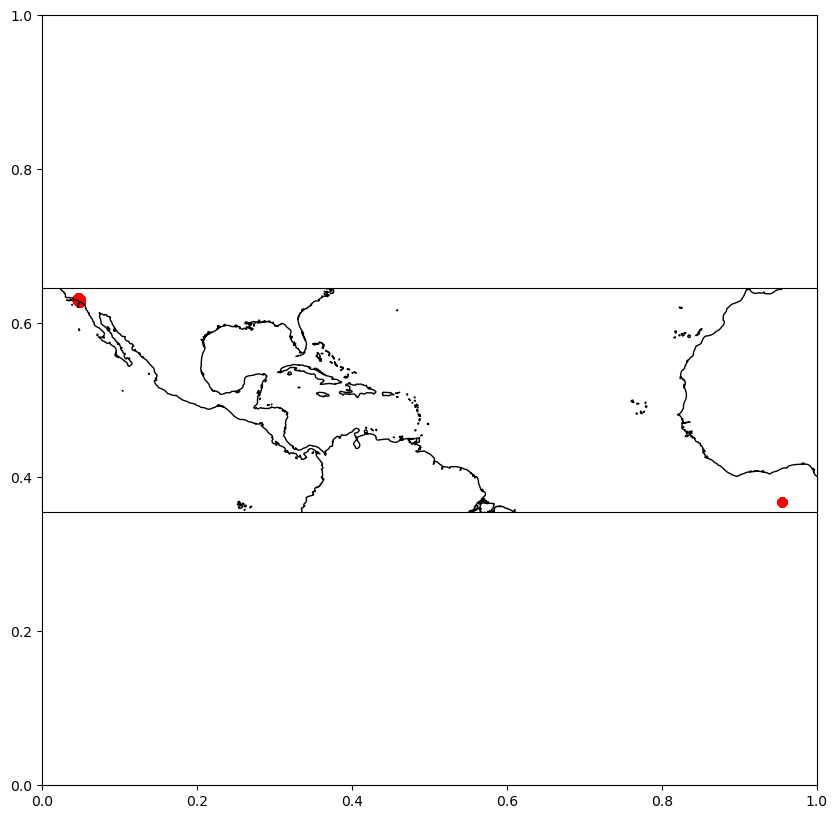

In [36]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Create the map
fig, ax = plt.subplots(figsize=(10, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

# Plot latitude and longitude
ax.scatter(df['LON'], df['LAT'], transform=ccrs.PlateCarree(), color='red', alpha=0.5)

# Show the plot
plt.show()


In [37]:
# import folium

# # Create a map centered on a specific location
# map = folium.Map(location=[34.0522, -118.2437], zoom_start=10)

# # Add markers to the map with hover information
# for index, row in df.iterrows():
#     popup_text = f"Location: {row['LOCATION']}<br>Date Occurred: {row['DATE OCC']}<br>Time Occurred: {row['TIME OCC']}"
#     marker = folium.Marker([row['LAT'], row['LON']], popup=popup_text, tooltip=row['LOCATION'])
#     marker.add_to(map)

# # Display the map
# map


In [38]:

# # Create a scatter mapbox figure
# fig = px.scatter_mapbox(df, lat="LAT", lon="LON", hover_data=["LOCATION", "DATE OCC", "TIME OCC"])

# # Update mapbox layout
# fig.update_layout(mapbox_style="open-street-map")
# fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})

# # Show the figure
# fig.show()
